# Время и сводные таблицы

Имеются следующие данные:

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute – сколько минут прошло с начала дня (во втором обновленном датасете)

<b>Задачи</b>: 
1. Загрузить датасет, проверить размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализировать результат с помощью барплота.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Построить гистограмму распределения числа успешных транзакций.
5. Построить сводную таблицу user_vs_minute_pivot по обновленному датасету, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполнить нулями.
6. Создать столбец с правильным числом минут, прошедших с начала дня. Построить график.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
# устанавливаем размер графиков
sns.set(rc={'figure.figsize':(15,9)})

In [3]:
# загрузка первого датасета
data = pd.read_csv('transaction_data.csv')

In [4]:
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
# загрузка второго обновленного датасета с кол-вом минут
df = pd.read_csv('transaction_data_updated.csv')

In [8]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
 3   minute       5315 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 166.2+ KB


In [10]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

Датасеты загружены, пропущенных значений нет. Размер строк одинаковый в двух датасетах. Второй датасет содержит доп.колонку с кол-вом минут. В колонке с датами тип object вместо datetime.

## Задачи

1. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализировать результат с помощью барплота.

In [11]:
data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

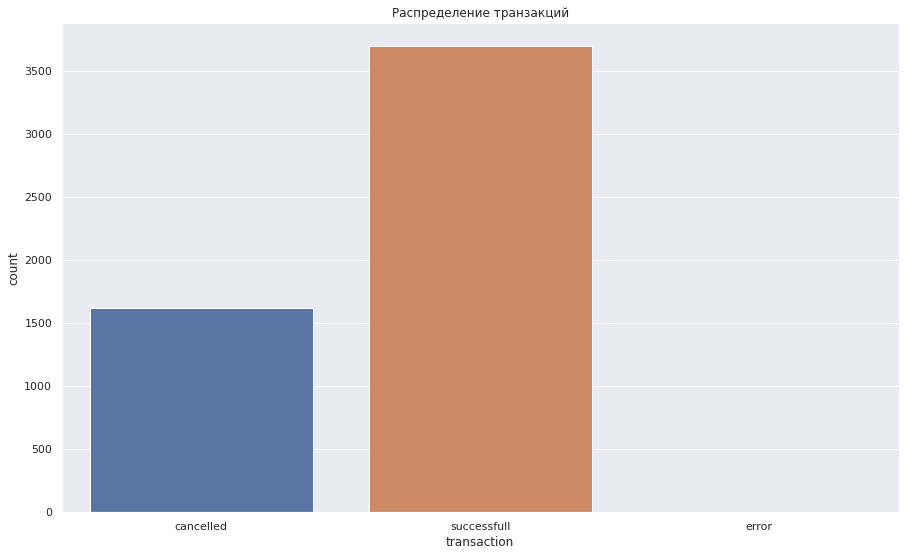

In [12]:
sns.countplot(data['transaction']).set(title="Распределение транзакций");

В колонке transaction три уникальных значения: успешная транзакция, отмененная, с ошибкой. Больше всего успешных транзакций.

2. Сколько транзакций завершились ошибкой?

С ошибкой завершилось всего 4 транзакции.

3. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

In [13]:
user_count_trans = data.query('transaction == "successfull"').groupby('name', as_index=False)\
    .agg({'transaction': 'count'})

In [14]:
user_count_trans.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


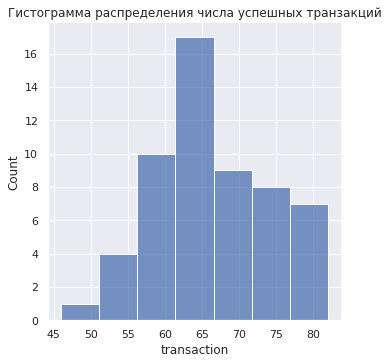

In [15]:
# гистограмма распределения числа успешных транзакций
sns.displot(user_count_trans.transaction).set(title="Гистограмма распределения числа успешных транзакций");

In [16]:
user_count_trans.transaction.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: transaction, dtype: float64

- Пользователи в среднем совершили примерно по 66 транзакций
- Максимальное число транзакций 82
- Минимальное число транзакций 46
- 25% пользователей совершили менее 61 транзакции

4. Коллега прислал нам обновленные данные (с доп.колонкой). Построить сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполнить нулями.

In [17]:
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False)\
    .agg({'transaction': 'count'})\
    .pivot(index='minute', columns='name', values='transaction')\
    .fillna(0)

In [18]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


5. Создать столбец с правильным числом минут, прошедших с начала дня. Построить график.

В новых данных закралась ошибка: в колонке minute извлекли минутную часть времени, а не число минут с начала дня. Исправим это в новой колонке true_minute.

In [19]:
# изменим тип с датой на datetime
df['date'] = pd.to_datetime(df.date)

In [20]:
# кол-во минут с начала дня до совершения транзакции
df['true_minute'] = df.date.dt.minute + (df.date.dt.hour * 60)

In [21]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [22]:
# начальная дата в данных
df.date.min()

Timestamp('2020-03-02 00:00:00')

In [23]:
# конечная дата в данных
df.date.max()

Timestamp('2020-03-02 01:29:05')

In [24]:
# данные представлены за 1 час 29 мин
df.date.max() - df.date.min()

Timedelta('0 days 01:29:05')

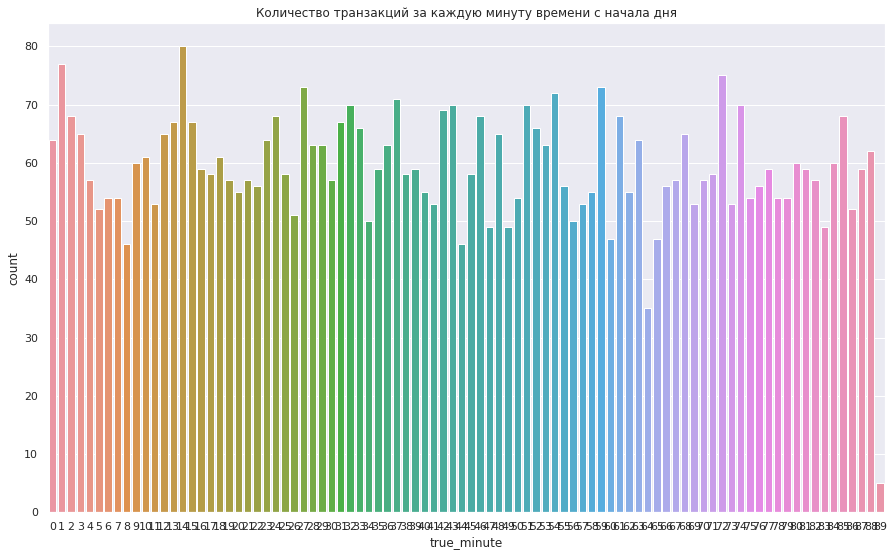

In [25]:
sns.countplot(df.true_minute).set(title="Количество транзакций за каждую минуту времени с начала дня");

## Выводы

В ходе работы было сделано:
1. Загружены и изучены датасеты.
2. Выявлено, какие значения находятся в колонке transaction и сколько наблюдений относятся к каждому значению. Построен барплот.
3. Посчитано, сколько транзакций завершились с ошибкой.
4. Посчитано, сколько успешных транзакций осуществил каждый из пользователей. Построена гистограмма распределения числа успешных транзакций.
5. Построена сводная таблица, где в качестве столбцов имена пользователей, строки – минуты, значения – число совершенных операций в указанную минуту.
6. Создан столбец с правильным числом минут, прошедших с начала дня. Построен график.